In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read csv file
df = pd.read_csv('/supermarket_Sales.csv')

In [2]:
#print first 5 rows
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment  Cost of goods sold  Gross margin percentage  \
0  13:08      Ewallet              522.83                 4.761905   
1  10:29         Cash   

Branch with highest income: C


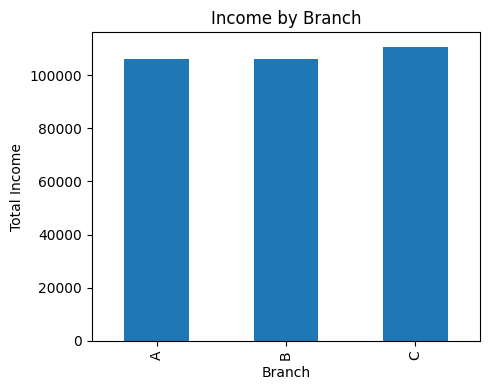

In [3]:
### 1)Which Branch achieves the highest income?
branch_income = df.groupby('Branch')['Total'].sum()
highest_income_branch = branch_income.idxmax()
print(f"Branch with highest income: {highest_income_branch}")
#bar char
plt.figure(figsize=(5,4))
branch_income.plot(kind='bar')
plt.title('Income by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Income')
plt.tight_layout()
plt.show()

Product line
Electronic accessories      Male
Fashion accessories       Female
Food and beverages        Female
Health and beauty           Male
Home and lifestyle        Female
Sports and travel         Female
dtype: object


<Figure size 1200x600 with 0 Axes>

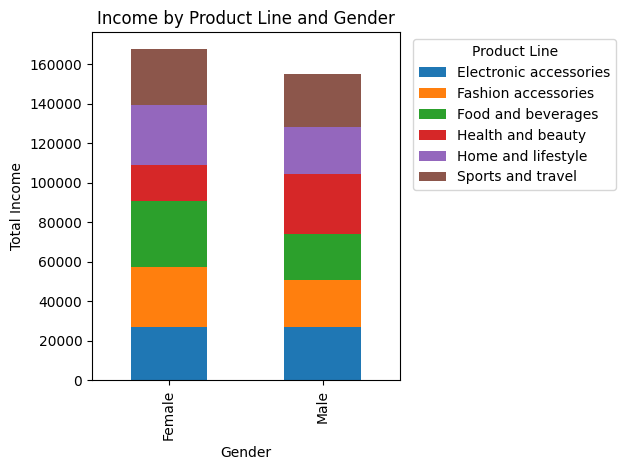

In [4]:
### 2)Which Product Line achieves the highest income for each gender?
g_p_income = df.groupby(['Gender', 'Product line'])['Total'].sum().unstack()
h_income_p_l = g_p_income.idxmax()
print(h_income_p_l)
#stacked bar char
plt.figure(figsize=(12, 6))
g_p_income.plot(kind='bar', stacked=True)
plt.title('Income by Product Line and Gender')
plt.xlabel('Gender')
plt.ylabel('Total Income')
plt.legend(title='Product Line', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64


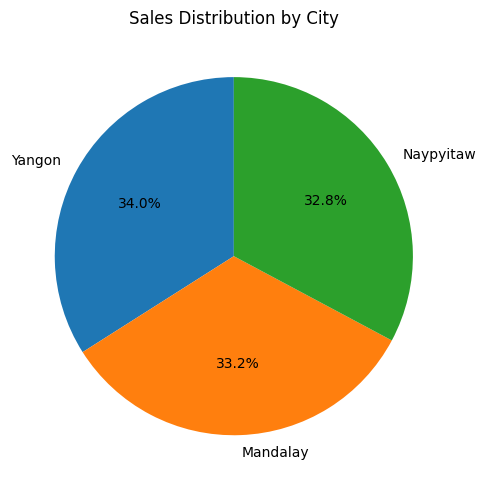

In [5]:
### 3)How many sales are done in each city?
sales_city = df['City'].value_counts()
print(sales_city)
#pie char
plt.figure(figsize=(8, 5))
sales_city.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Sales Distribution by City')
plt.ylabel('')
plt.tight_layout()
plt.show()

Payment with highest income: Cash


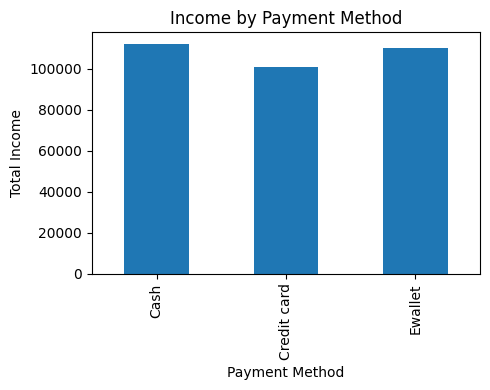

In [6]:
### 4)Which "Payment" achieves the highest income?
payment_income = df.groupby('Payment')['Total'].sum()
highest_income_payment = payment_income.idxmax()
print(f"Payment with highest income: {highest_income_payment}")
#bar char
plt.figure(figsize=(5,4))
payment_income.plot(kind='bar')
plt.title('Income by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Income')
plt.tight_layout()
plt.show()

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Customer stratification rating, dtype: float64


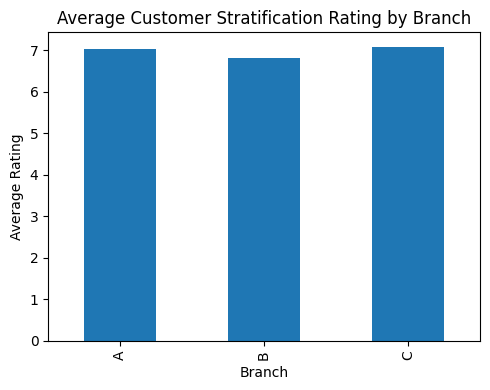

In [7]:
### 5)What is the average Customer stratification rating per branch?
avg_rate_branch = df.groupby('Branch')['Customer stratification rating'].mean()
print(avg_rate_branch)
#bar char
plt.figure(figsize=(5,4))
avg_rate_branch.plot(kind='bar')
plt.title('Average Customer Stratification Rating by Branch')
plt.xlabel('Branch')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

In [8]:
#convert to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

<ipython-input-8-44a19e329147>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


Month
1    352
2    303
3    345
Name: count, dtype: int64


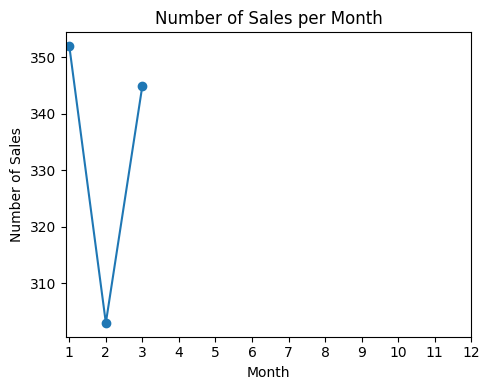

In [9]:
### 6)How many sales are done in each month?
df['Month'] = df['Date'].dt.month
sales_m = df['Month'].value_counts().sort_index()
print(sales_m)
#line char
plt.figure(figsize=(5,4))
sales_m.plot(kind='line', marker='o')
plt.title('Number of Sales per Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

Percentage of income made on weekends: 31.14%


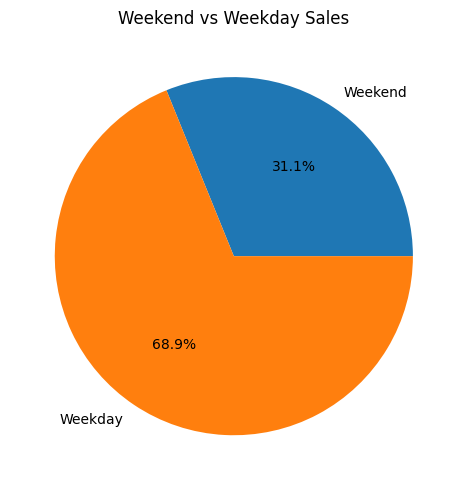

In [10]:
### 7)What percentage of income is made in weekends (Saturday, Sunday)?
df['Weekday'] = df['Date'].dt.dayofweek
weekend_sales = df[df['Weekday'].isin([5, 6])]['Total'].sum()
weekday_sales = df[~df['Weekday'].isin([5, 6])]['Total'].sum()
total_sales = df['Total'].sum()
weekend_percentage = (weekend_sales / total_sales) * 100
print(f"Percentage of income made on weekends: {weekend_percentage:.2f}%")

plt.figure(figsize=(8,5))
plt.pie([weekend_sales, weekday_sales], labels=['Weekend', 'Weekday'], autopct='%1.1f%%')
plt.title('Weekend vs Weekday Sales')
plt.tight_layout()
plt.show()

Hour with the highest number of sales: 19


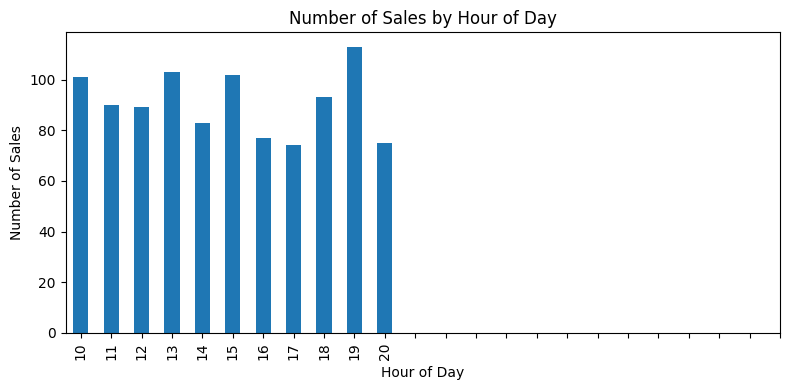

In [11]:
### 8)Which hour of the day has the highest number of sales?
df['Hour'] = df['Time'].dt.hour
h_sales = df['Hour'].value_counts().sort_index()
h_m_sales = h_sales.idxmax()
print(f"Hour with the highest number of sales: {h_m_sales}")
#bar char
plt.figure(figsize=(8, 4))
h_sales.plot(kind='bar')
plt.title('Number of Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sales')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64


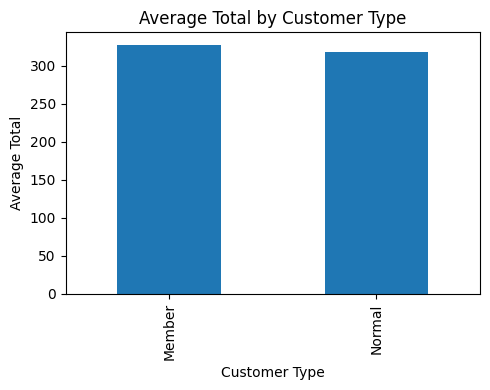

In [12]:
### 9)Average total by customer type?
cust_type = df.groupby('Customer type')['Total'].mean()
print(cust_type)
#bar char
plt.figure(figsize=(5,4))
cust_type.plot(kind='bar')
plt.title('Average Total by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Total')
plt.tight_layout()
plt.show()


9d. Busiest day of the week: Saturday


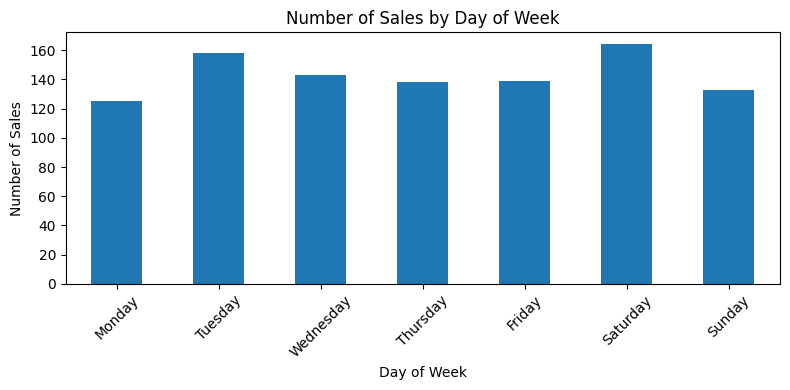

In [13]:
### 10)Number of Sales by Day of Week?
day_sales = df['Weekday'].value_counts().sort_index()
busiest_day = day_sales.idxmax()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(f"9d. Busiest day of the week: {day_names[busiest_day]}")
#bar char
plt.figure(figsize=(8,4))
day_sales.plot(kind='bar')
plt.title('Number of Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Sales')
plt.xticks(range(7), day_names, rotation=45)
plt.tight_layout()
plt.show()

Payment
Cash           5343.170
Credit card    4798.432
Ewallet        5237.767
Name: Tax 5%, dtype: float64


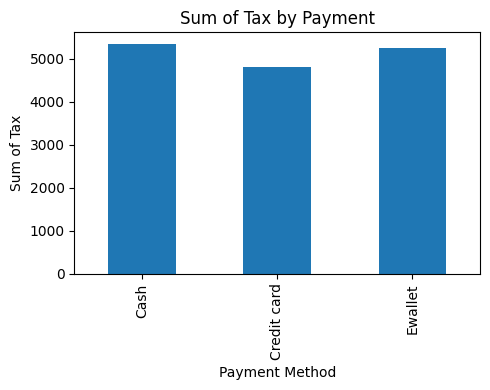

In [14]:
# Calculate sum of tax by payment method
tax_payment = df.groupby('Payment')['Tax 5%'].sum()
print(tax_payment)
#bar char
plt.figure(figsize=(5,4))
tax_payment.plot(kind='bar')
plt.title('Sum of Tax by Payment')
plt.xlabel('Payment Method')
plt.ylabel('Sum of Tax')
plt.tight_layout()
plt.show()